# Upper Confidence Bound (UCB) in Python
<hr>

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<hr>

## Importing the Dataset

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

<hr>

## Implementing UCB

In [3]:
import math

N = 10000   # Total Number of Users
d = 10      # Total Number of ads
ads_selected = []
nums_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if nums_of_selections[i] > 0:
            avg_reward = sums_of_rewards[i] / nums_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / nums_of_selections[i])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    nums_of_selections[ad] += 1

    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

<hr>

## Visualising the results

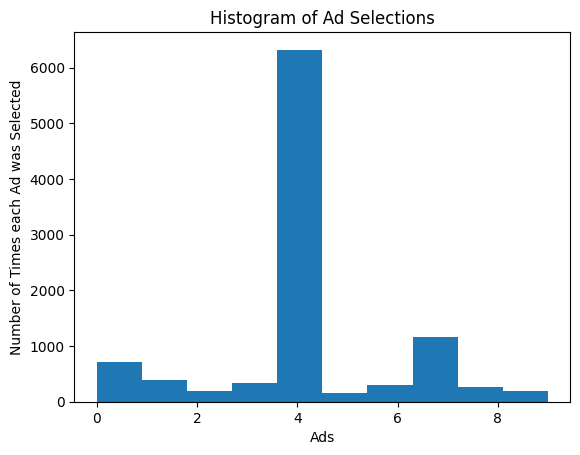

In [4]:
plt.hist(ads_selected)
plt.title("Histogram of Ad Selections")
plt.xlabel("Ads")
plt.ylabel("Number of Times each Ad was Selected")
plt.show()

<hr>